# 4th-year course
## Lecture 1: Nuclear masses
### York, UK, 2025, Tuesday 11 February 2025 11:00-12:00, $\color{red}{\mbox{Check in code 293110}}$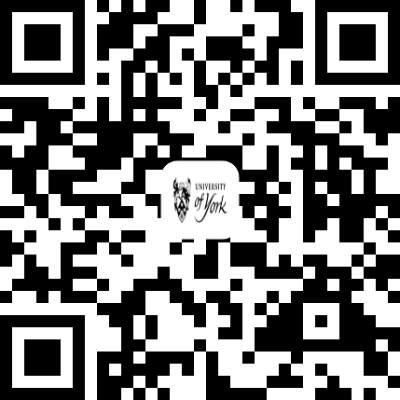
jacek.dobaczewski@york.ac.uk


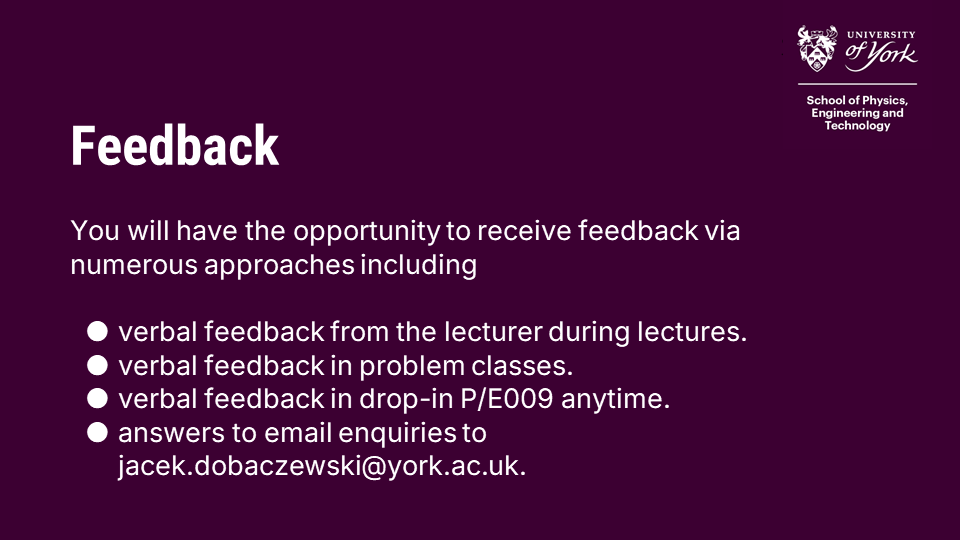


# This course will be delivered in the jupyter-notebook format

### To run it, please download it from the [anaconda](https://www.anaconda.com/) website.

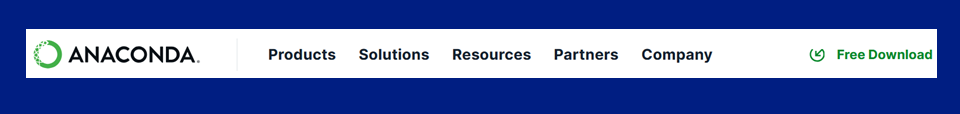

### This notebook and all files referred to and linked to, along with its pdf transcript, are available on VLE.

In [2]:
# Import of modules

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Not really needed, but nicer plots
import seaborn as sns
sns.set()
sns.set_context("talk")

# Experimental nuclear masses
    
###  $$M(A,Z) = Z (m_P + m_e) + (A-Z) m_N - E_{atomic} (A,Z) - E_B(A,Z)$$

###  $M(A,Z)$ is the mass of the neutral atom
  
###  $Z$ is the atomic number
  
###  $A$ is the mass number; the number of neutrons is thus $N=A-Z$
  
###  $m_P$ is the mass of a proton, $m_e$ is the mass of an electron, $m_N$ is the mass of a neutron
  
###  $E_{atomic} (A,Z)$ is the binding energy of all electrons in the neutral atom
  
###  $E_B(A,Z)$ is the nuclear binding energy
  
###  $$E=mc^2,~~~~\mbox{and}~~~~c=1$$
  
 ## We express all energies and masses in mega-electronovolts (MeV), or eV, keV, or meV.
  
 ## 1 MeV is the energy that an elementary charge $e$ gains in en electrostatic potential of one million volts
  

# The Segré chart ([Table of Nuclides](https://atom.kaeri.re.kr/nuchart/)) 
                                  
#### J.Erler et al.,   [Nature 486, 509 (2012)](https://www.nature.com/articles/nature11188)


  ![image.png](Segre.chart.png)
  


  
## Download the experimental mass table
    
###  [The 2020 Atomic Mass Evaluation](https://www-nds.iaea.org/amdc/ame2020/massround.mas20.txt)

  
![image.png](AME2016.png)

### In the python-readable format

![image.png](mass16round-sum.png)



In [4]:
AME2016k = []
AME2016N = []
AME2016Z = []
AME2016A = []
AME2016B = []
mydata = np.loadtxt("mass16round-sum.txt")

for i in range(0,len(mydata)):
     AME2016k.append(mydata[i][0])    #Python starts counting on 0
     AME2016N.append(mydata[i][1]) 
     AME2016Z.append(mydata[i][2])
     AME2016A.append(mydata[i][3])
     AME2016B.append(mydata[i][4])

print(len(mydata))

2453


## Current inventory of measured nuclear binding energies contains 2453 entries
  


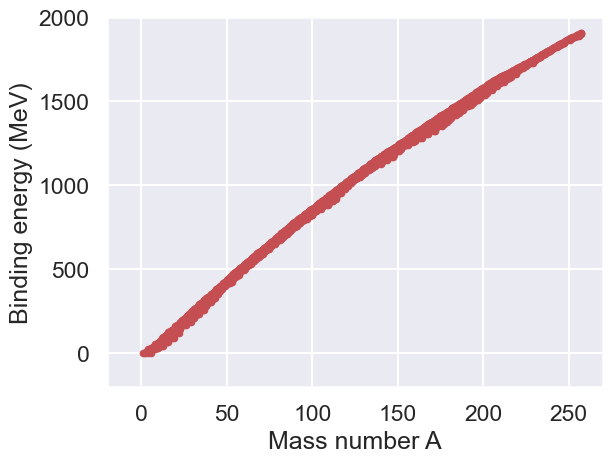

In [5]:

plt.plot(AME2016A,AME2016B,'r.')
plt.axis([-20, 270, -200, 2000])
#plt.axis([-2, 22, -10, 210])
plt.xlabel('Mass number A')
plt.ylabel('Binding energy (MeV)')
plt.show()

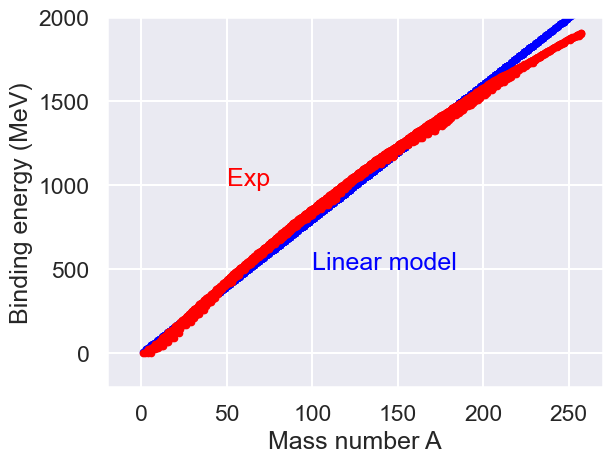

In [6]:
aV = 8

BindingLD= []
for i in range(0,len(mydata)):
    A = AME2016A[i]
    e = aV * A 
    BindingLD.append(e)

plt.plot(AME2016A,BindingLD,'.',color='blue')
plt.plot(AME2016A,AME2016B,'.',color='red')
plt.axis([-20, 270, -200, 2000])
#plt.axis([-2, 22, -10, 210])
#plt.axis([38, 52, 240, 510])
plt.xlabel('Mass number A')
plt.ylabel('Binding energy (MeV)')
plt.text(50,1000,'Exp',color='red')
plt.text(100,500,'Linear model',color='blue')
plt.show()

##                                     The origin of nuclear binding [arxiv.nucl-th/0301069](https://arxiv.org/abs/nucl-th/0301069), J.H. Rose et al. [PRL 53 (1984) 344](https://doi-org.libproxy.york.ac.uk/10.1103/PhysRevLett.53.344)
    
  ![image.png](Lancaster.150825-09.slide41.png)

# Liquid-drop model and liquid-drop mass formula
    
##  $$E_B(A,Z) = a_V A - a_S A^{\frac{2}{3}} - a_C \frac{Z^2}{A^{\frac{1}{3}}} - a_I \frac{(A-2Z)^2}{A} + \delta(A)$$
  
##  $a_V$ is the volume energy coefficient
  
##  $a_S$ is the surface energy coefficient
  
##  $a_C$ is the Coulomb energy coefficient
  
##  $a_I$ is the symmetry energy coefficient
  
##  $\delta(A)$ is the pairing-energy term
  
##  $$\delta(A) = \left\{\begin{array}{ll}
                       a_P A^{-3/4} & \mbox{for even-even nuclei} \\
                       0            & \mbox{for odd nuclei} \\
                       -a_P A^{-3/4} & \mbox{for odd-odd nuclei} \\
                       \end{array}\right.$$           
  
 

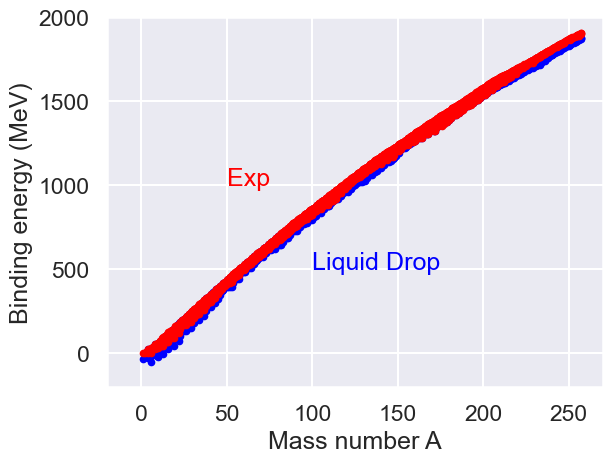

In [7]:
# Generating the liquid-drop parameters

# values given in the 1980 book of Ring & Schuck,
# "The Nuclear Many-Body Problem", {Springer-Verlag, Berlin, 1980}

aV = 15.98
aS = 18.56
aC = 0.717
aI = 28.1
aP = 34

# modifiers

#aV = 17
#aS = 0
#aC = 0
#aI = 0
#aP = 0

# Generating the liquid-drop binding energies

onethird = 1/3
twothird = 2/3
threefourth = 3/4

BindingLD= []
for i in range(0,len(mydata)):
    A = AME2016A[i]
    N = AME2016N[i]
    Z = AME2016Z[i]
    e = aV * A - aS * A**twothird -aC * Z**2/A**onethird -aI * (A-2*Z)**2/A
    if (N % 2) == 0 and (Z % 2) == 0:
        e = e + aP * A**(-threefourth)
    if (N % 2) == 1 and (Z % 2) == 1:
        e = e - aP * A**(-threefourth)
    BindingLD.append(e)

plt.plot(AME2016A,BindingLD,'.',color='blue')
plt.plot(AME2016A,AME2016B,'.',color='red')
plt.axis([-20, 270, -200, 2000])
#plt.axis([-2, 22, -10, 210])
#plt.axis([38, 52, 240, 510])
plt.xlabel('Mass number A')
plt.ylabel('Binding energy (MeV)')
plt.text(50,1000,'Exp',color='red')
plt.text(100,500,'Liquid Drop',color='blue')
plt.show()

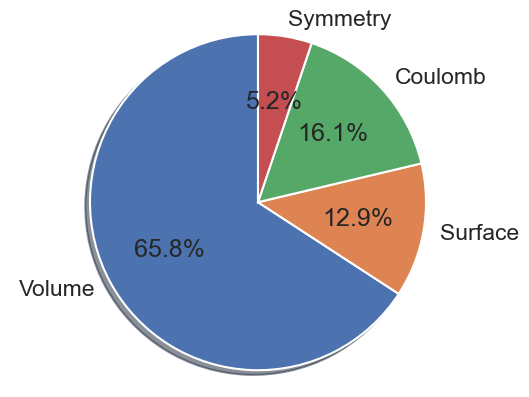

In [8]:
BindingLDatA= []

onethird = 1/3
twothird = 2/3
threefourth = 3/4

N = 126
Z = 82
A = N+Z
eV = aV * A 
eS = aS * A**twothird
eC = aC * Z**2/A**onethird
eI = aI * (A-2*Z)**2/A
eP = 0
if (N % 2) == 0 and (Z % 2) == 0:
    eP = + aP * A**(-threefourth)
if (N % 2) == 1 and (Z % 2) == 1:
    eP = - aP * A**(-threefourth)
    
BindingLDatA.append(eV)
BindingLDatA.append(eS)
BindingLDatA.append(eC)
BindingLDatA.append(eI)
# BindingLDatA.append(eP)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
# labels = ['Volume', 'Surface', 'Coulomb', 'Symmetry', 'Pairing']
labels = ['Volume', 'Surface', 'Coulomb', 'Symmetry']
# sizes = [eV, eS, eC, eI, eP]
sizes = [eV, eS, eC, eI]
# explode = (0.1, 0, 0, 0)  # only "explode" the 1st slice)
explode = (0, 0, 0, 0)  # do not "explode")

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


    
  #        The symmetry energy.
  
 ### Let us have look at the chain of isobars (nuclei having the same mass number A), which have the same volume and surface energies.
  
 

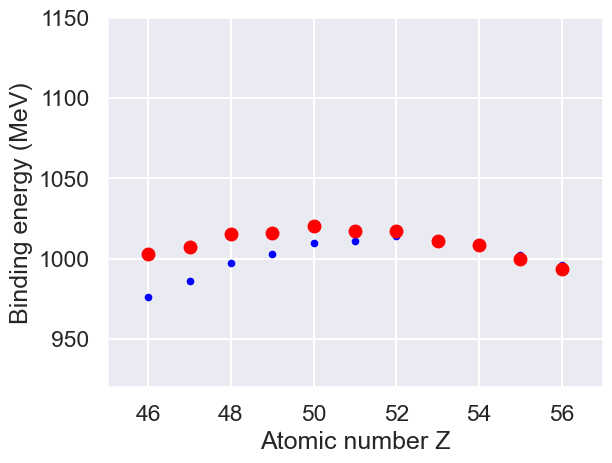

In [9]:
# Generating data for the isobaric A=120 chain

AME2016B120=[]
AME2016Z120=[]
LDB120=[]
for i in range(0,len(mydata)):
    A = AME2016A[i]
    if (A==120):
        AME2016B120.append(AME2016B[i])
        AME2016Z120.append(AME2016Z[i])
        LDB120.append(BindingLD[i])

plt.plot(AME2016Z120,LDB120,'.',color='blue')
plt.plot(AME2016Z120,AME2016B120,'o',color='red')
plt.axis([45, 57, 920, 1150])
plt.xlabel('Atomic number Z')
plt.ylabel('Binding energy (MeV)')
plt.show()


    
  #        The pairing energy.
  
 ### Odd-even mass staggering.
 
 $$OES_N(N,Z)=E_B(N,Z)-\frac{1}{2}\left(E_B(N+1,Z)+E_B(N-1,Z)\right)$$
  
 $$OES_Z(N,Z)=E_B(N,Z)-\frac{1}{2}\left(E_B(N,Z+1)+E_B(N,Z-1)\right)$$
  
 

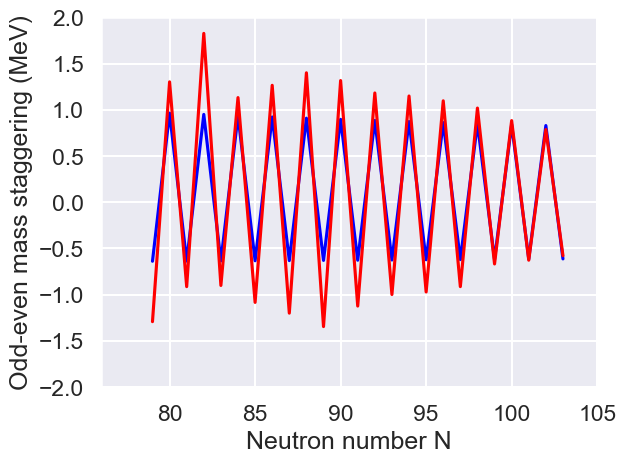

In [10]:
# Generating data for the odd-even staggering in the isotopic chain Z=68 (erbium)

AME2016N68=[]
AME2016n68=[]
AME2016B68=[]
LDB68=[]
AME2016b68=[]
LDb68=[]
AME2016S68=[]
LDS68=[]
for i in range(0,len(mydata)):
    Z = AME2016Z[i]
    if (Z==68):
        AME2016B68.append(AME2016B[i])
        AME2016n68.append(AME2016N[i])
        LDB68.append(BindingLD[i])
for i in range(1,len(LDB68)-1):
    am=AME2016B68[i-1]
    a0=AME2016B68[i]
    ap=AME2016B68[i+1]
    AME2016S68.append(a0-(am+ap)/2)

    am=LDB68[i-1]
    a0=LDB68[i]
    ap=LDB68[i+1]
    LDS68.append(a0-(am+ap)/2)

    AME2016N68.append(AME2016n68[i])

plt.plot(AME2016N68,LDS68,'-',color='blue')
plt.plot(AME2016N68,AME2016S68,'-',color='red')
plt.axis([76, 105, -2, 2])
plt.xlabel('Neutron number N')
plt.ylabel('Odd-even mass staggering (MeV)')
plt.show()


    
  #        Residuals of the liquid-drop mass formula
  
 ###                   Differences between theory (model) and experiment
 
 

RMS deviation= 17.61587984416369


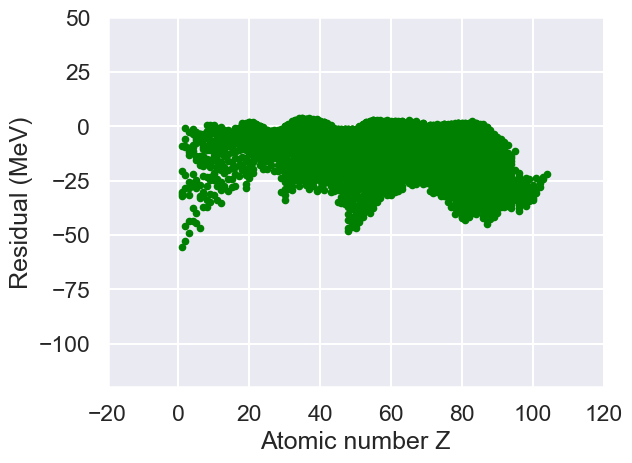

In [11]:
# Generating the liquid-drop parameters

# values given in the 1980 book of Ring & Schuck

aV = 15.98
aS = 18.56
aC = 0.717
aI = 28.1
aP = 34

# modifiers

#aV = 16 
#aS = 0
#aC = 0
#aI = 0
#aP = 0

# Generating the liquid-drop binding energies

onethird = 1/3
twothird = 2/3
threefourth = 3/4

import math

RMSdeviation=0
ResidualLD= []
for i in range(0,len(mydata)):
    A = AME2016A[i]
    N = AME2016N[i]
    Z = AME2016Z[i]
    e = aV * A - aS * A**twothird -aC * Z**2/A**onethird -aI * (A-2*Z)**2/A
    if (N % 2) == 0 and (Z % 2) == 0:
        e = e + aP * A**(-threefourth)
    if (N % 2) == 1 and (Z % 2) == 1:
        e = e - aP * A**(-threefourth)
    ResidualLD.append(e-AME2016B[i])
    RMSdeviation=RMSdeviation+ResidualLD[i]**2
    
RMSdeviation=math.sqrt(RMSdeviation/len(mydata))

print ('RMS deviation=',RMSdeviation)

plt.plot(AME2016Z,ResidualLD,'.',color='green')
plt.axis([-20, 270, -100, 50])
plt.axis([-20, 160, -100, 50])
plt.axis([-20, 120, -120, 50])
plt.xlabel('Neutron number N')
plt.xlabel('Mass number A')
plt.xlabel('Atomic number Z')
plt.ylabel('Residual (MeV)')
plt.show()


    
  #        2020 parameterization of the liquid-drop mass formula
  
  #### published in:
  
 ### Bethe–Weizsäcker semiempirical mass formula coefficients 2019 update based on AME2016
 ### Djelloul Benzaid, Salaheddine Bentridi, Abdelkader Kerraci, Naima Amrani
 ### Nuclear Science and Techniques, [31:9, 3 January 2020](https://doi.org/10.1007/s41365-019-0718-8)
 
   $$\delta(A) = \left\{\begin{array}{ll}
                       a_P A^{-1/2} & \mbox{for even-even nuclei} \\
                       0            & \mbox{for odd nuclei} \\
                       -a_P A^{-1/2} & \mbox{for odd-odd nuclei} \\
                       \end{array}\right.$$           

 

RMS deviation= 4.938714487029749


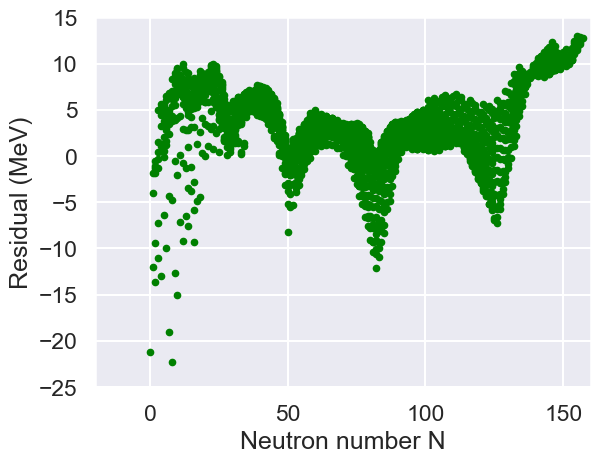

In [12]:
# Generating the liquid-drop parameters

# values given in the recent paper, Benzaid et al. (2020)

aV = 14.64
aS = 14.08
aC =  0.64
aI = 21.07
aP = 11.54

# modifiers

#aV = 14.5
#aS = 0
#aC = 0
#aI = 0
#aP = 0

# Generating the liquid-drop binding energies

onethird = 1/3
twothird = 2/3
onehalf = 1/2

RMSdeviation=0
ResidualLD= []
for i in range(0,len(mydata)):
    A = AME2016A[i]
    N = AME2016N[i]
    Z = AME2016Z[i]
    e = aV * A - aS * A**twothird -aC * Z**2/A**onethird -aI * (A-2*Z)**2/A
    if (N % 2) == 0 and (Z % 2) == 0:
        e = e + aP * A**(-onehalf)
    if (N % 2) == 1 and (Z % 2) == 1:
        e = e - aP * A**(-onehalf)
    ResidualLD.append(e-AME2016B[i])
    RMSdeviation=RMSdeviation+ResidualLD[i]**2
    
RMSdeviation=math.sqrt(RMSdeviation/len(mydata))

print ('RMS deviation=',RMSdeviation)

plt.plot(AME2016N,ResidualLD,'.',color='green')
plt.axis([-20, 270, -25, 15])
plt.axis([-20, 160, -25, 15])
#plt.axis([-20, 120, -25, 15])
plt.xlabel('Mass number A')
plt.xlabel('Neutron number N')
#plt.xlabel('Atomic number Z')
plt.ylabel('Residual (MeV)')
plt.show()

# Nuclear DFT - a primer

### The binding energy $E$ is defined as an integral of the energy density ${\cal H}(r)$, which depends on the kinetic density $\tau(r)$ and particle density $\rho(r)$:
    
  ### $$E\equiv\int\,dr\,{\cal H}(r),\quad\mbox{for}\quad {\cal H}(r)=\frac{\hbar^2}{2m}\tau(r)-\frac{1}{2}C\rho^2(r),\quad \rho(r)=\sum_{i=1}^A \phi_i(r)\phi^*_i(r),\quad \tau(r)=\sum_{i=1}^A (\nabla\phi_i(r))(\nabla\phi^*_i(r))$$

### Density Functional Theory (DFT) is based on a variational method, whereupon the single-particle (Kohn-Sham) orbitals $\phi_i(r)$ are obtained as:

### $$\delta_{\phi^*_i(r)}E[\tau(r),\rho(r)]=0\quad\Longrightarrow \left[-\frac{\hbar^2}{2m}\Delta - C\rho(r) \right]\phi_i(r)=\epsilon_i\phi_i(r)$$

### DFT looks like a mean-field approximation, it smells like a mean-field approximation, and it seems to be a mean-field approximation, but $\color{red}{\mbox{DFT is NOT a mean-field approximation.}}$ There exists an EXACT functional $E[\rho(r)]$ for which DFT gives the EXACT energy and the EXACT density. 


# Mass table based on the UNEDF0 Skyrme density functional:                                           
                        

                      
   M. Kortelainen et al.,   [Phys. Rev. C 82, 024313 (2010)](https://journals.aps.org/prc/abstract/10.1103/PhysRevC.82.024313)                      
                     
                        
  
## Download the mass table
    
  
  [Skyrme UNEDF0 even-even nuclei](http://massexplorer.frib.msu.edu/content/DFTMassTables.html)



In [13]:
UNEDF0k = []
UNEDF0N = []
UNEDF0Z = []
UNEDF0A = []
UNEDF0B = []
mydata2 = np.loadtxt("All_Even-Even_Nuclei.UNEDF0-cut.txt")

for i in range(0,len(mydata2)):
    UNEDF0k.append(i)    #Python starts counting on 0
    UNEDF0Z.append(mydata2[i][0]) 
    UNEDF0N.append(mydata2[i][1])
    UNEDF0A.append(mydata2[i][2])
    UNEDF0B.append(mydata2[i][3])
for i in range(0,len(mydata2)):
    UNEDF0B[i]=-UNEDF0B[i]

print (len(mydata2))

2243


## Database of calculated UNEDEF0 even-even nuclei 2243 entries
  


RMS deviation= 1.6593899570797244


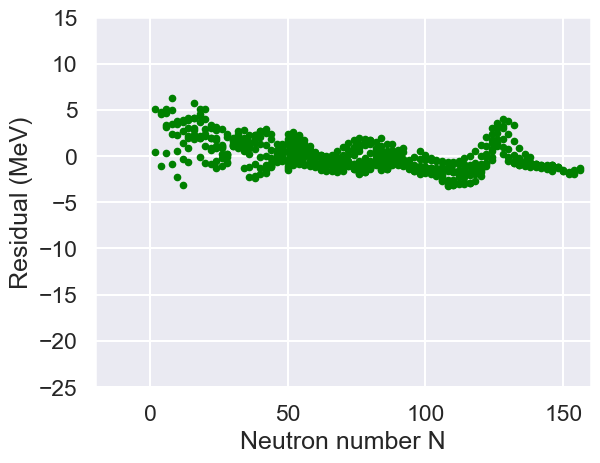

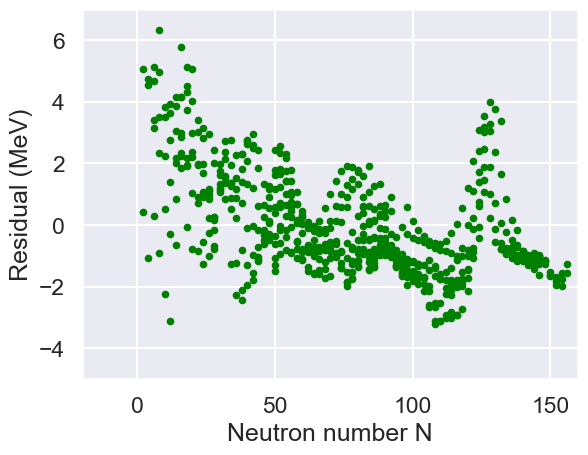

In [14]:
ResidualUN=[]
ResidualA=[]
ResidualN=[]
ResidualZ=[]
BindingUN=[]
BindingAM=[]
for i in range(0,len(mydata)):
    N = AME2016N[i]
    Z = AME2016Z[i]
    for j in range(0,len(mydata2)):
        if (N == UNEDF0N[j] and Z == UNEDF0Z[j]):
#            print (i,j)
            ResidualUN.append(UNEDF0B[j]-AME2016B[i])
            ResidualA.append(N+Z)
            ResidualN.append(N)
            ResidualZ.append(Z)
            BindingUN.append(UNEDF0B[j])
            BindingAM.append(AME2016B[i])
    
RMSdeviation=0
for i in range(0,len(ResidualUN)):
    RMSdeviation=RMSdeviation+ResidualUN[i]**2

RMSdeviation=math.sqrt(RMSdeviation/len(ResidualUN))

print ('RMS deviation=',RMSdeviation)

plt.plot(ResidualN,ResidualUN,'.',color='green')
plt.axis([-20, 270, -25, 15])
plt.axis([-20, 160, -25, 15])
#plt.axis([-20, 120, -25, 15])
plt.xlabel('Mass number A')
plt.xlabel('Neutron number N')
#plt.xlabel('Atomic number Z')
plt.ylabel('Residual (MeV)')
plt.show()

plt.plot(ResidualN,ResidualUN,'.',color='green')
plt.axis([-20, 270, -25, 15])
plt.axis([-20, 160, -5, 7])
#plt.axis([-20, 120, -25, 15])
plt.xlabel('Mass number A')
plt.xlabel('Neutron number N')
#plt.xlabel('Atomic number Z')
plt.ylabel('Residual (MeV)')
plt.show()

# Modern nuclear DFT + corrections:

###      [arXiv2011.07904](https://arxiv.org/abs/2011.07904)

### [The European Physical Journal A volume 57, Article number: 333 (2021) ](https://link.springer.com/article/10.1140/epja/s10050-021-00642-1)

![image.png](arXiv2011.07904.png)
    
### $\color{red}{\mbox{RMS error on the 2408 known masses of 661 keV}}$  
  

# Modern nuclear Liquid Drop + corrections:

###      [Atomic Data and Nuclear Data Tables 109–110 (2016) 1–204](http://dx.doi.org/10.1016/j.adt.2015.10.002)


![image.png](AtomicDataandNuclearDataTables109-1.png)
    
### $\color{red}{\mbox{The error of the mass model is 559.5 keV for 2149 nuclei}}$  
  

# Take-home messages
    
###  Nucleon-nucleon potential has a minimum around 0.9 fm and therefore nuclear matter in equilibrium has a binding energy per particle of about 8 MeV.
  
###  Nuclear binding energy (positive) can be described as a sum of five terms:
  
####  (1) large positive volume term, (2) large negative surface term, (3) large negative Coulomb term, (4) relatively small negative symmetry term, and  (5) small pairing term with alternating sign
  
####   Coulomb and symmetry terms are responsible for the stability valey turning for large A towards more neutron-rich nuclei
  
####   Pairing term is responsible for the odd-even mass staggering along isotopic and isotonic chains
  
###   Liquid-drop mass formula describes experimental masses with the RMS deviation of about 5 MeV
  
###   Modern nuclear DFT describes experimental masses with the RMS deviation of about 1.7 MeV

###  With correctons, the modern nuclear DFT and liquid-drop mass formula describe experimental masses with the RMS deviation of about 0.6 MeV  
  